In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [3]:
# checking for null values & structure of the dataset will be analysed
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.duplicated().any()

False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
data.shape

(180, 9)

In [8]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
# outliers will be detected using interquartile range and visualized using boxplot
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<Axes: xlabel='Income'>

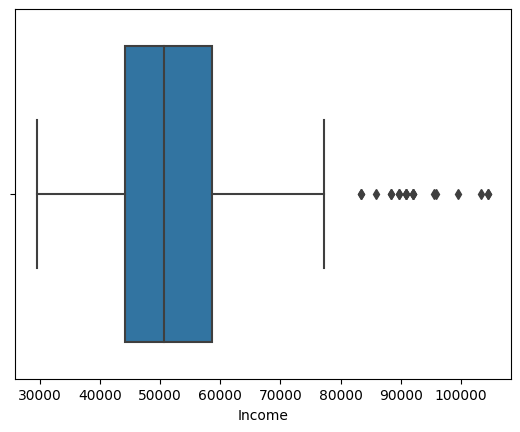

In [10]:
data.head()
import seaborn as sns
sns.boxplot(x=data['Income'])

In [11]:
# finding inter quartile range
q3=data['Income'].quantile(0.75)
q1=data['Income'].quantile(0.25)
iqr=q3-q1

In [12]:
iqr

14609.25

In [14]:
upper_limit=data['Income'].quantile(0.75)+iqr
upper_limit

73277.25

In [16]:
data[data['Income']>upper_limit]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
155,KP781,25,Male,18,Partnered,6,5,75946,240
156,KP781,25,Male,20,Partnered,4,5,74701,170
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280


<Axes: ylabel='Miles'>

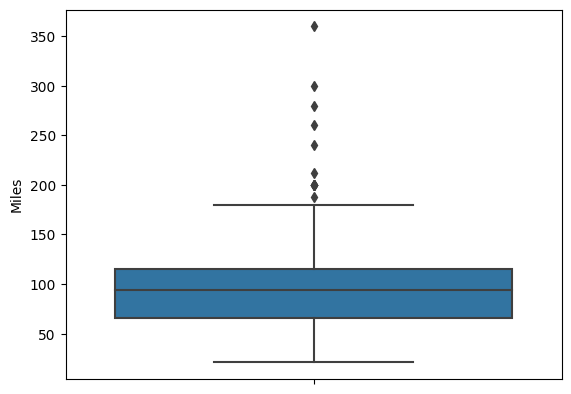

In [ ]:
# outliers detection using boxplot of column Miles
sns.boxplot(y=data['Miles'])




In [ ]:
iqr1=data['Miles'].quantile(0.75)-data['Miles'].quantile(0.25)
upper_limit1=data['Miles'].quantile(0.75)+iqr1


66.0

In [ ]:
iqr1

48.75

In [ ]:
upper_limit1

163.5

In [ ]:
# the records greater than this upper limit are considered as an outliers
outliers1=data[data['Miles']>upper_limit1]
outliers1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
61,KP281,34,Male,16,Single,4,5,51165,169
84,KP481,21,Female,14,Partnered,5,4,34110,212
103,KP481,25,Male,14,Partnered,4,3,45480,170
120,KP481,33,Male,13,Partnered,4,4,53439,170
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240


<Axes: ylabel='Age'>

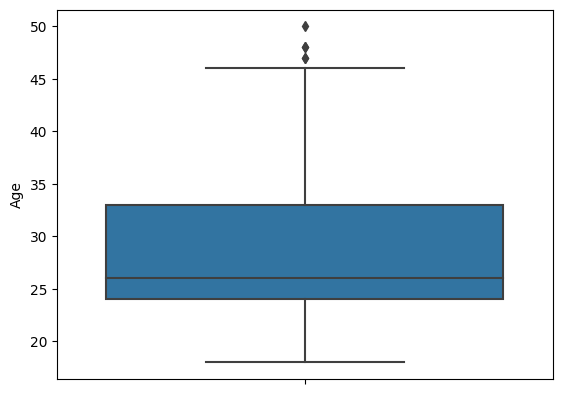

In [ ]:
# outliers detection based on age
sns.boxplot(y=data['Age'])


In [ ]:
iqr3=data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
iqr3

9.0

In [ ]:
upper_limit3=data['Age'].quantile(0.75)+iqr3
upper_limit3

42.0

In [ ]:
# the records greater than that of upperlimit is considered as an outliers
outliers4=data[data['Age']>upper_limit3]


In [ ]:
outliers4

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
138,KP481,45,Male,16,Partnered,2,2,54576,42
139,KP481,48,Male,16,Partnered,2,3,57987,64
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# there is no need to calculate lower_limit because below lowerlimit there are no o

In [ ]:
data[data['Income']<upper_limit]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
153,KP781,25,Male,18,Partnered,4,3,64741,100
154,KP781,25,Male,18,Partnered,6,4,70966,180
157,KP781,26,Female,21,Single,4,3,69721,100
158,KP781,26,Male,16,Partnered,5,4,64741,180


In [ ]:
# finding difference between mean and median
mean=(data['Income'].mean())
median=(data['Income'].median())

In [ ]:
mean

53719.57777777778

In [ ]:
median

50596.5

In [ ]:
diff= mean-median
diff
# here we can observe clearly that mean is greater than median so thats why mean is shifted right towards the upper side
# here upperside contains outliers

3123.0777777777766

In [ ]:
# check if features like martial status,age have any effect on the products purchased
data



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# details of the countplot
pd.crosstab(data['MaritalStatus'],data['Product'],margins=True)


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


<Axes: xlabel='MaritalStatus', ylabel='count'>

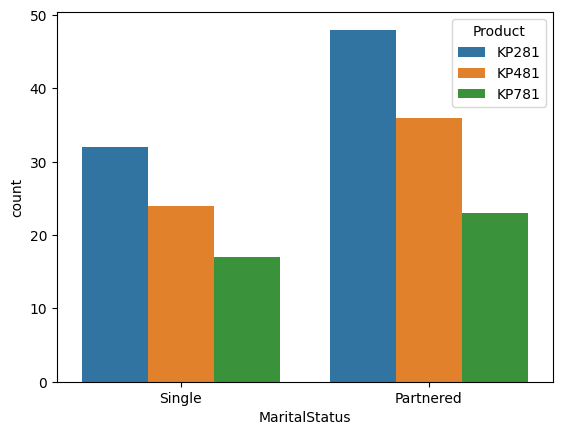

In [ ]:
sns.countplot(x='MaritalStatus',hue='Product',data=data)

In [ ]:
# analysis based on age  using barplot
data.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<Axes: xlabel='Product', ylabel='Age'>

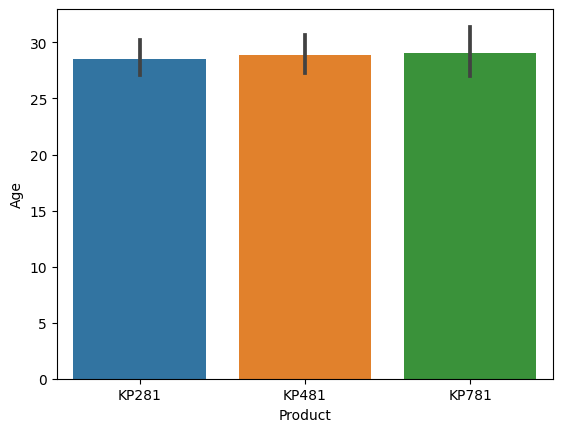

In [ ]:
sns.barplot(x='Product',y='Age',data=data)

In [ ]:
pd.crosstab(data['Age'],data['Product'],margins=True)

Product,KP281,KP481,KP781,All
Age,,,,
18,1,0,0,1
19,3,1,0,4
20,2,3,0,5
21,4,3,0,7
22,4,0,3,7
23,8,7,3,18
24,5,3,4,12
25,7,11,7,25
26,7,3,2,12


<Axes: xlabel='Product', ylabel='Age'>

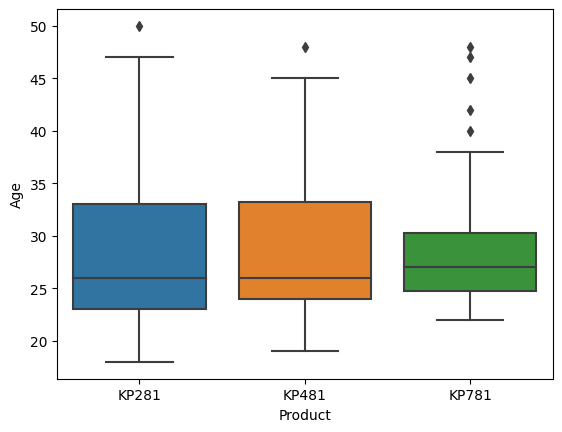

In [ ]:
# analysis of products purchased based on age using barplot
sns.boxplot(x='Product',y='Age',data=data)

In [ ]:
# for detailed understanding
p=data[data['Product']=='KP281']
p[['Product','Age']].value_counts()
# in above boxplot width of boxplot is more at the people age between 23 to 32 age people has buyed more no  of tredmills  of "kp281"

Product  Age
KP281    23     8
         25     7
         26     7
         28     6
         24     5
         38     4
         21     4
         22     4
         29     3
         19     3
         27     3
         35     3
         34     2
         33     2
         32     2
         31     2
         30     2
         20     2
         41     1
         47     1
         46     1
         44     1
         43     1
         18     1
         40     1
         39     1
         37     1
         36     1
         50     1
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

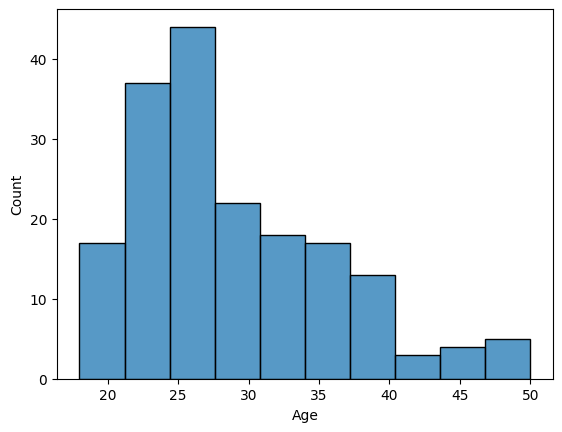

In [ ]:
data
# we are going to visualize using histplots
sns.histplot(data['Age'],bins=10)

In [ ]:
# representing marginal probability like what percent of customers purchased "KP281,KP481,or KP781" in a table

In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
pd.crosstab(data['Product'],[data['Age'],data['Gender']],margins=True,normalize='index')

Age            18        19                  20                  21            \
Gender       Male    Female      Male    Female      Male    Female      Male   
Product                                                                         
KP281    0.012500  0.012500  0.025000  0.012500  0.012500  0.025000  0.025000   
KP481    0.000000  0.000000  0.016667  0.016667  0.033333  0.016667  0.033333   
KP781    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All      0.005556  0.005556  0.016667  0.011111  0.016667  0.016667  0.022222   

Age            22                  23  ...        40        41        42  \
Gender     Female      Male    Female  ...      Male      Male      Male   
Product                                ...                                 
KP281    0.037500  0.012500  0.037500  ...  0.012500  0.012500  0.000000   
KP481    0.000000  0.000000  0.050000  ...  0.016667  0.000000  0.000000   
KP781    0.000000  0.075000  0.025000  ...  0.025000  0.000000  0.025000   
All      0.016667  0.022222  0.038889  ...  0.016667  0.005556  0.005556   

Age            43        44        45        46        47        48        50  
Gender       Male    Female      Male    Female      Male      Male    Female  
Product                                                                        
KP281    0.012500  0.012500  0.000000  0.012500  0.012500  0.000000  0.012500  
KP481    0.000000  0.000000  0.016667  0.000000  0.000000  0.016667  0.000000  
KP781    0.000000  0.000000  0.025000  0.000000  0.025000  0.025000  0.000000  
All      0.005556  0.005556  0.011111  0.005556  0.011111  0.011111  0.005556  

[4 rows x 51 columns]

In [ ]:
# already with respect to information of product buyed by the customer like KP281,KP481, ETC
#we are going to find out the probabibilty that the person  age,gender,maritalstatus should be there
#age

In [ ]:

pd.crosstab(data['Product'],[data['Age'],data['Gender'],data['MaritalStatus']],margins=True,normalize='index')

Age                  18        19                  20                      \
Gender             Male    Female      Male    Female      Male             
MaritalStatus    Single Partnered    Single Partnered Partnered    Single   
Product                                                                     
KP281          0.012500  0.012500  0.025000  0.012500  0.012500  0.000000   
KP481          0.000000  0.000000  0.016667  0.016667  0.000000  0.033333   
KP781          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All            0.005556  0.005556  0.016667  0.011111  0.005556  0.011111   

Age                  21                            22  ...        41  \
Gender           Female      Male              Female  ...      Male   
MaritalStatus Partnered Partnered    Single Partnered  ... Partnered   
Product                                                ...             
KP281          0.025000  0.000000  0.025000  0.012500  ...  0.012500   
KP481          0.016667  0.033333  0.000000  0.000000  ...  0.000000   
KP781          0.000000  0.000000  0.000000  0.000000  ...  0.000000   
All            0.016667  0.011111  0.011111  0.005556  ...  0.005556   

Age                  42        43        44        45                  46  \
Gender             Male      Male    Female      Male              Female   
MaritalStatus    Single Partnered    Single Partnered    Single Partnered   
Product                                                                     
KP281          0.000000  0.012500  0.012500  0.000000  0.000000  0.012500   
KP481          0.000000  0.000000  0.000000  0.016667  0.000000  0.000000   
KP781          0.025000  0.000000  0.000000  0.000000  0.025000  0.000000   
All            0.005556  0.005556  0.005556  0.005556  0.005556  0.005556   

Age                  47        48        50  
Gender             Male      Male    Female  
MaritalStatus Partnered Partnered Partnered  
Product                                      
KP281          0.012500  0.000000  0.012500  
KP481          0.000000  0.016667  0.000000  
KP781          0.025000  0.025000  0.000000  
All            0.011111  0.011111  0.005556  

[4 rows x 77 columns]

In [ ]:
# conditional probability the person having age,gender and maritalstatus information  based on
#it what is the probability that the person is buying the product Kp281,kp481,kp781 etc

In [ ]:

pd.crosstab(data['Product'],[data['Age'],data['Gender'],data['MaritalStatus']],margins=True,normalize='columns')

Age               18        19                  20                         21  \
Gender          Male    Female      Male    Female      Male           Female   
MaritalStatus Single Partnered    Single Partnered Partnered Single Partnered   
Product                                                                         
KP281            1.0       1.0  0.666667       0.5       1.0    0.0  0.666667   
KP481            0.0       0.0  0.333333       0.5       0.0    1.0  0.333333   
KP781            0.0       0.0  0.000000       0.0       0.0    0.0  0.000000   

Age                                   22  ...     42        43     44  \
Gender             Male           Female  ...   Male      Male Female   
MaritalStatus Partnered Single Partnered  ... Single Partnered Single   
Product                                   ...                           
KP281               0.0    1.0       1.0  ...    0.0       1.0    1.0   
KP481               1.0    0.0       0.0  ...    0.0       0.0    0.0   
KP781               0.0    0.0       0.0  ...    1.0       0.0    0.0   

Age                  45               46        47        48        50  \
Gender             Male           Female      Male      Male    Female   
MaritalStatus Partnered Single Partnered Partnered Partnered Partnered   
Product                                                                  
KP281               0.0    0.0       1.0       0.5       0.0       1.0   
KP481               1.0    0.0       0.0       0.0       0.5       0.0   
KP781               0.0    1.0       0.0       0.5       0.5       0.0   

Age                 All  
Gender                   
MaritalStatus            
Product                  
KP281          0.444444  
KP481          0.333333  
KP781          0.222222  

[3 rows x 78 columns]

In [ ]:
# corelations using heatmaps
data.corr()

<ipython-input-25-2c9133e8ca02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-27-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

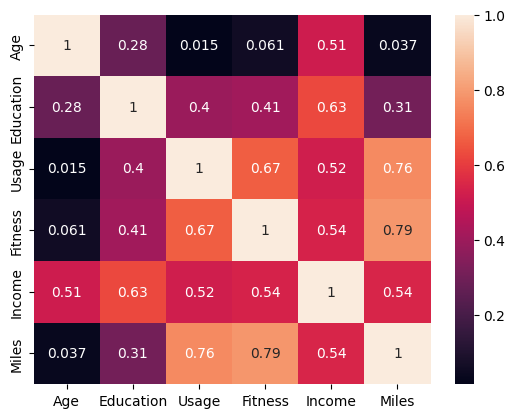

In [ ]:
# heatmaps using pearson corelation concept
sns.heatmap(data.corr(),annot=True)

In [17]:
# statistical insights
# 25% people having age lesser than 24
# 50% people having age ,lesser than 26
# 75% people having age lesser than 33
# maximum age as per the statistics is 50
# the Income greater than 73277.25 considered as an outliers
# in Miles column  the miles that are greater than 163.5  are considered as an outliers
# the mean is greater than median so outliers are on the upper side because mean is higly influenced to outliers mean was
# shifted towards the outlier where outlier concentration is more



In [18]:
#business insights
# based on countplot visualization i came to know that kp281 is the bestseller product for partenered people sales are 48 , kp781 is the product that have less sales
# for people whose marital status is partnered
# KP281  is bestseller product for people whose maritalstatus is  32 and least is 17
# based on histplot analysis the people with age group of 22 to 28 more people are indulged in buying tredmills
# based on  pearson correlation concepts we plotted heatmaps
# age is correlated with income if age is more means experience will be more so income will be more in jobs it is correlated more compared to other features
# education is more means more qualification gives us high pay salary in jobs so income will be more for it. so it is correlated more
# usage is more means fitness and no of miles per week will  intensify  so both are strongly correlated amog themselves



In [ ]:
# recommendations
# as per our observations we came to know that sales for whose marital status  is partenered is having more sales of different tredmills of kp281,kp481,kp781
# aerofit should concentrate on the people whose marital status is single because their sales are dragged in order to push the sales they should have to manfacture  the
# tredmills which are flexible to the single and vouchers ,offers should be provided  in order to increase the sales of the people who comes under partenered and in order to
# push the sales of people who comes under single
# in order to increase the sales of tredmills their uses and how it helps to make us fit these type of details should be provided in the form of advertisements it will amplify
# the business because online is the best platform for promotion of products that are manufactured by companies it will  give more awareness in short period of time to all people
# dasara offers,diwali offers will give encouragement to consumers  to buy the products

